# L02-E5-Piping
## Exercise Instructions

* Complete all cells as instructed, replacing any ??? with the appropriate code

* Execute Jupyter **Kernel** > **Restart & Run All** and ensure that all code blocks run without error


# Using the Pipe Operator %>% 

As we add more complexity in the form of different data manipulations through functions, the code becomes difficult to read and thus more error prone. The pipe operator can help.

The pipe operator, %>%, can be used to take the result of the expression on the left side of the pipe and feed it into the first parameter of the function on the right side of the pipe.

We will take the opportunity to see how the previous exercise can benefit from using the pipe syntax. Since our code is pretty simple right now, the readability might not be that improved by using the pipe. But as more and more function calls are nested, the benefits of the pipe become obvious. 

Since the tidyverse was built with the pipe in mind, it works well with the pipe. A notable exception is ggplot, which was created before standardizing on the pipe, and thus it has its own type of pipe operator, the plus sign. That is why ggplot uses pluses to connect statements while the other packages use pipes instead. 


## R Features
* %>% pipe operator
* library()
* glimpse()
* select()
* <- variable assignment operator
* head()
* tail()
* arrange()
* desc()
* labs()
* filter()
* ggplot()
* geom_jitter()
* geom_smooth()
* facet_wrap()
* facet_grid()

## Datasets
* mpg

# Load libraries

In [21]:
library(tidyverse)

Loading the tidyverse defines the pipe operator, it isn't built into R. If you get an error like this, remember to load the tidyverse library first. 

Error in eval(expr, envir, enclos): could not find function "%>%"

# Explore data's structure

In [22]:
# Dataframe: mpg
glimpse(mpg)

# Using pipe
mpg %>% glimpse()

Observations: 234
Variables: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi", "audi", …
$ model        <chr> "a4", "a4", "a4", "a4", "a4", "a4", "a4", "a4 quattro", …
$ displ        <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2…
$ year         <int> 1999, 1999, 2008, 2008, 1999, 1999, 2008, 1999, 1999, 20…
$ cyl          <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8,…
$ trans        <chr> "auto(l5)", "manual(m5)", "manual(m6)", "auto(av)", "aut…
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "4", "4", "4", "4", "…
$ cty          <int> 18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, …
$ hwy          <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, …
$ fl           <chr> "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "…
$ class        <chr> "compact", "compact", "compact", "compact", "compact", "…
Observations: 234
Variables: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi"

Notice that it is just moving the first function parameter to the left side of the pipe. In single function calls, it might not be necessary to use the pipe since it is all about code readability whatever works best for you

# Using select()
Let's start by selecting only the variables we need for plotting.

Use the form: 

select(dataframe_name, column1, column2, column3, column4)

In [23]:
# Select columns: hwy, displ, cyl, and class
select(mpg, hwy, displ, cyl, class)

# Using pipe
mpg %>% select(hwy , displ, cyl, class)

hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,1.8,4,compact
29,1.8,4,compact
31,2.0,4,compact
30,2.0,4,compact
26,2.8,6,compact
26,2.8,6,compact
27,3.1,6,compact
26,1.8,4,compact
25,1.8,4,compact


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,1.8,4,compact
29,1.8,4,compact
31,2.0,4,compact
30,2.0,4,compact
26,2.8,6,compact
26,2.8,6,compact
27,3.1,6,compact
26,1.8,4,compact
25,1.8,4,compact


# Store result in a variable
Store the result from select(). Let's use the generic df variable name. I use this a lot for temporary variables and inside function. df stands for data frame. We will use the two character assignment operator '<-'. 

In [24]:
# Select columns: hwy, displ, cyl, and class
# Store in variable: df
df <- select(mpg, hwy, displ, cyl, class)

# Using pipe
df <- mpg %>% select(hwy, displ, cyl, class)

# Explore the data's structure
The above block didn't have any output so we didn't see anything. But we can look at what is in this data frame

Do you recall the function?

In [25]:
# Hint: glimpse()
glimpse(df)

# Using pipe
df %>% glimpse ()

Observations: 234
Variables: 4
$ hwy   <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, 25, 24,…
$ displ <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2.8, 2.8…
$ cyl   <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, …
$ class <chr> "compact", "compact", "compact", "compact", "compact", "compact…
Observations: 234
Variables: 4
$ hwy   <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, 25, 24,…
$ displ <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2.8, 2.8…
$ cyl   <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, …
$ class <chr> "compact", "compact", "compact", "compact", "compact", "compact…


# Using head() and tail()
There are two other functions for looking at the data, head() and tail(). Run both of those passing in our data frame variable.

In [26]:
# Use head()
head(df)

# Using pipe
df %>% head ()

# Use tail()
tail(df)

# Using pipe
df %>% tail()

hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,1.8,4,compact
29,1.8,4,compact
31,2.0,4,compact
30,2.0,4,compact
26,2.8,6,compact
26,2.8,6,compact


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,1.8,4,compact
29,1.8,4,compact
31,2.0,4,compact
30,2.0,4,compact
26,2.8,6,compact
26,2.8,6,compact


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,1.8,4,midsize
28,2.0,4,midsize
29,2.0,4,midsize
26,2.8,6,midsize
26,2.8,6,midsize
26,3.6,6,midsize


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,1.8,4,midsize
28,2.0,4,midsize
29,2.0,4,midsize
26,2.8,6,midsize
26,2.8,6,midsize
26,3.6,6,midsize


# Altering the number of rows in head() and tail()
What if we wanted a different number of rows returned? We can pass a number to head() and tail() representing the number of rows we want them to return. This is the n parameter.

How could you find the parameter name? It is described in the function's help documentation.

In [27]:
# Return the top 2 rows
head(df, n = 2)

# Using pipe
df %>% head(n = 2 )

# Return the bottom 3 rows
tail(df, n = 3)

# Using pipe
df %>% tail( n = 3)

hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,1.8,4,compact
29,1.8,4,compact


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,1.8,4,compact
29,1.8,4,compact


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
26,2.8,6,midsize
26,2.8,6,midsize
26,3.6,6,midsize


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
26,2.8,6,midsize
26,2.8,6,midsize
26,3.6,6,midsize


# Using positional arguments with head()
Would head(df, 2) work without the 'n = '?

In [28]:
# Return the first 7 rows using parameter position instead of name
head(df, 7)

# Using pipe
df %>% head(7)

hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,1.8,4,compact
29,1.8,4,compact
31,2.0,4,compact
30,2.0,4,compact
26,2.8,6,compact
26,2.8,6,compact
27,3.1,6,compact


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,1.8,4,compact
29,1.8,4,compact
31,2.0,4,compact
30,2.0,4,compact
26,2.8,6,compact
26,2.8,6,compact
27,3.1,6,compact


Notice that this looks a bit better because the 'n = ' parameter is removed. Now it is easier to see that head is returning 7 rows.

# Using arrange()
Let's take our smaller data frame and find the vehicles with the worst highway miles per gallon. 

In [29]:
# arrange df by lowest hwy
arrange(df, hwy)

# Using pipe
df %>% arrange(hwy)

hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
12,4.7,8,pickup
12,4.7,8,suv
12,4.7,8,pickup
12,4.7,8,pickup
12,4.7,8,suv
14,5.3,8,suv
14,6.1,8,suv
15,5.3,8,suv
15,5.7,8,suv


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
12,4.7,8,pickup
12,4.7,8,suv
12,4.7,8,pickup
12,4.7,8,pickup
12,4.7,8,suv
14,5.3,8,suv
14,6.1,8,suv
15,5.3,8,suv
15,5.7,8,suv


The pipe version seems easier for me to understand.

# Combining head() and arrange()
Let's combine head and arrange to get the top 6 worst gas guzzlers. 

To do this you will need to wrap the arrange function inside the head function. The innermost function is processed first and it works its way out.

It takes the form:

outer_function(inner_function (something))

In [30]:
# Display the top 7 worst gas guzzlers
# Hint: head(), arrange()
head(arrange(df, hwy))

# Using pipe
df %>% arrange(hwy) %>% ??? ()

ERROR: Error in parse(text = x, srcfile = src): <text>:6:30: unexpected ')'
5: # Using pipe
6: df %>% arrange(hwy) %>% ??? ()
                                ^


As things become more complex, the pipe version is easier to read and easier to code.

# Combining functions with parameters
What if you want to pass parameters to these functions such as changing the n value of the head parameter? 

Where does the n parameter go?

Positional argument function nesting takes the form:

outer_function(inner_function(inner_parameter1, inner_parameter2), outer_parameter2)

Where is outer_parameter1? It is the return value of inner_function. This is the positional way to specify parameters. It is also possible to specify the parameter name. This is the recommended way to make the code more readable when there is a lot of function nesting. 

Named argument function nesting takes the form:

outer_function(outer_arg1 = inner_function(inner_arg1 = inner_parameter1, inner_arg2 = inner_parameter2), outer_arg2 = outer_parameter2)

In [31]:
# Display the top 2 worst hwy vehicles 
# Hint: head(), arrange()
head(arrange(df, hwy), n = 2)

# Using pipe
df %>% arrange(hwy) %>% head(n = 2)

hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
12,4.7,8,pickup
12,4.7,8,suv


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
12,4.7,8,pickup
12,4.7,8,suv


I would normally remove the 'n = ' for readability. 

For few functions, a single line might read better. With more functions, adding new lines after each pipe is helpful.

In [32]:
# How about the highest hwy
# Hint: tail()
tail(arrange(df, hwy))

# Using pipe
df %>% arrange(hwy) %>% tail ()

hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
36,1.8,4,subcompact
36,1.8,4,subcompact
37,1.8,4,compact
41,1.9,4,subcompact
44,1.9,4,compact
44,1.9,4,subcompact


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
36,1.8,4,subcompact
36,1.8,4,subcompact
37,1.8,4,compact
41,1.9,4,subcompact
44,1.9,4,compact
44,1.9,4,subcompact


In [33]:
# Get the top 10 highest hwy vehicles
# Hint: head(), arrange(), desc()
head(arrange(df, desc(hwy)), n = 10)

# Using pipe
df %>% arrange( hwy %>% desc()) %>% head(n = 10)

hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
44,1.9,4,compact
44,1.9,4,subcompact
41,1.9,4,subcompact
37,1.8,4,compact
36,1.8,4,subcompact
36,1.8,4,subcompact
35,1.8,4,compact
35,1.8,4,compact
34,1.8,4,subcompact


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
44,1.9,4,compact
44,1.9,4,subcompact
41,1.9,4,subcompact
37,1.8,4,compact
36,1.8,4,subcompact
36,1.8,4,subcompact
35,1.8,4,compact
35,1.8,4,compact
34,1.8,4,subcompact


This one is interesting because there is a second pipeline for hwy into desc(). You can have as many of these as you want. Sometimes I need to put "( )" around the whole thing like (hwy %>% desc()) if R doesn't evaluate in the order I am hoping for. I add parenthesis only when required. Parenthesis wasn't necessary in this case.

In [34]:
# Let's order by more than one column
# Order by by class, then by highest hwy
# Return top 10
head(arrange(df, class, desc(hwy)), n = 10)

# Using pipe + new lines
df %>% 
   arrange( class , hwy %>% desc()) %>% 
   head(n = 10)

hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
26,5.7,8,2seater
26,6.2,8,2seater
25,6.2,8,2seater
24,7.0,8,2seater
23,5.7,8,2seater
44,1.9,4,compact
37,1.8,4,compact
35,1.8,4,compact
35,1.8,4,compact


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
26,5.7,8,2seater
26,6.2,8,2seater
25,6.2,8,2seater
24,7.0,8,2seater
23,5.7,8,2seater
44,1.9,4,compact
37,1.8,4,compact
35,1.8,4,compact
35,1.8,4,compact


As more functions are strung together, I find it easier to read if I put them on their own line. I manually indent each line for readability. If you are coding in R frequently, look for tool that has auto indent such as RStudio.

# Using filter()
The filter function takes a comma seperated list of boolean expressions, meaning that each expression evaluates to true or false or NA. The list of expressions are implicitly ANDed together. The comparison operators are <, <=, ==, >=, >, <>, !=. The last two both mean 'not equal'. Note that for equality it uses two equal signs also called a double equal. 

Within each expression, there can be sub expressions using nested parenthesis and those can be ANDed using '&' or ORed using '|'.


In [35]:
# Let's find those 5 cylinder vehicles
# Use the double equal
filter(df, cyl == 5)

# Using pipe
df %>% filter( cyl == 5)

hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,2.5,5,compact
29,2.5,5,compact
28,2.5,5,subcompact
29,2.5,5,subcompact


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
29,2.5,5,compact
29,2.5,5,compact
28,2.5,5,subcompact
29,2.5,5,subcompact


# Create and plot a filtered dataframe
Let's create a filtered data frame removing 5 cylinder and then plot it.

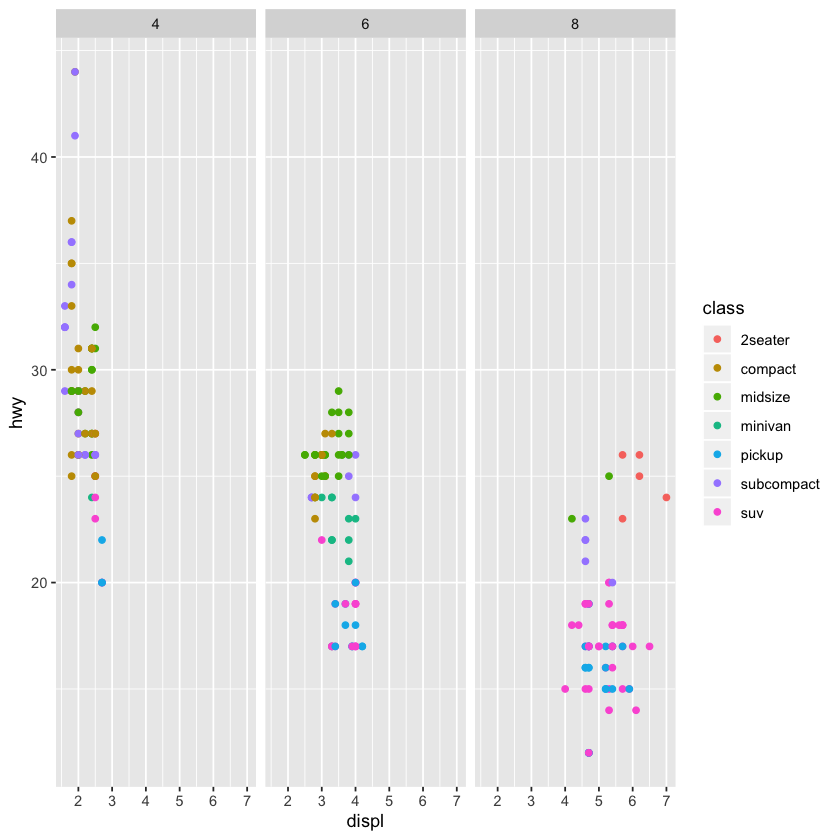

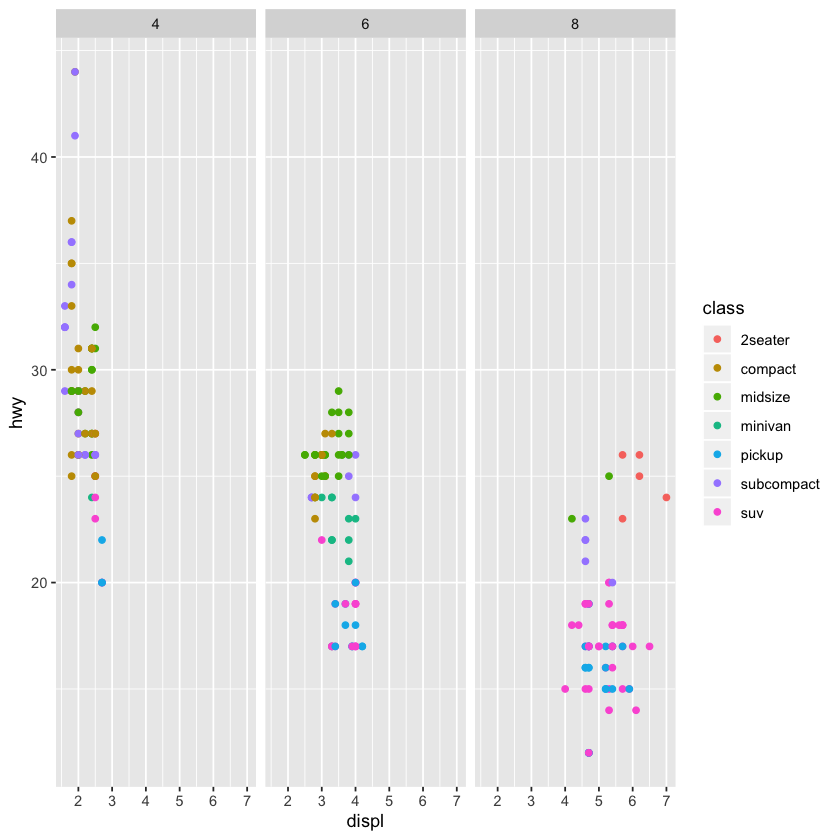

In [36]:
# Name: df_filtered
# Filter: remove 5 cylinder rows
df_filtered <- filter(df, cyl != 5)  # != or <> can be used for not equal

# Using pipe
df_filtered <- df %>% filter(cyl !=5)

# Plot: scatterplot x = displ, y = hwy; facet by cyl
ggplot(df_filtered, mapping = aes(x = displ, y = hwy, color = class)) +
   geom_point() +
   facet_wrap( ~ cyl )

# Using pipe
df_filtered %>% ggplot(mapping = aes(x = displ, y = hwy, color = class )) + 
   geom_point() +
   facet_wrap( ~ cyl )

Notice that the pipe eventually returns the final value which is assigned to df_filtered. R can assign it at the end with -> df_filtered but all other langauges only have variable assignments on the left hand side of the expression. So we will use that to make R seem a bit more 'normal'.

# Filtered plot with some polish
You can use the variable from the cell above df_filtered in this cell. Everything is running in the same R kernel. So it remembers everything regardless of where the code it, you just need to run it for the R kernel to know about it.

Using the existing df_filtered data frame and the previous plot paramaters, add +jitter, +alpha (0.5), and +smooth (linear) with no confidence interval bands. Facet by class and cyl. Connect class to color.

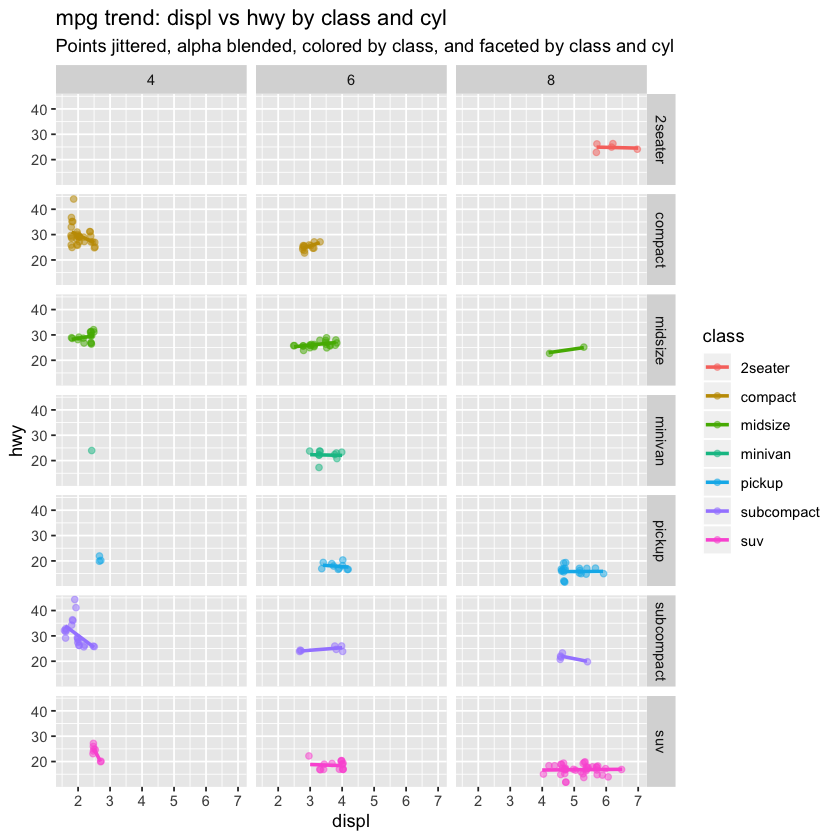

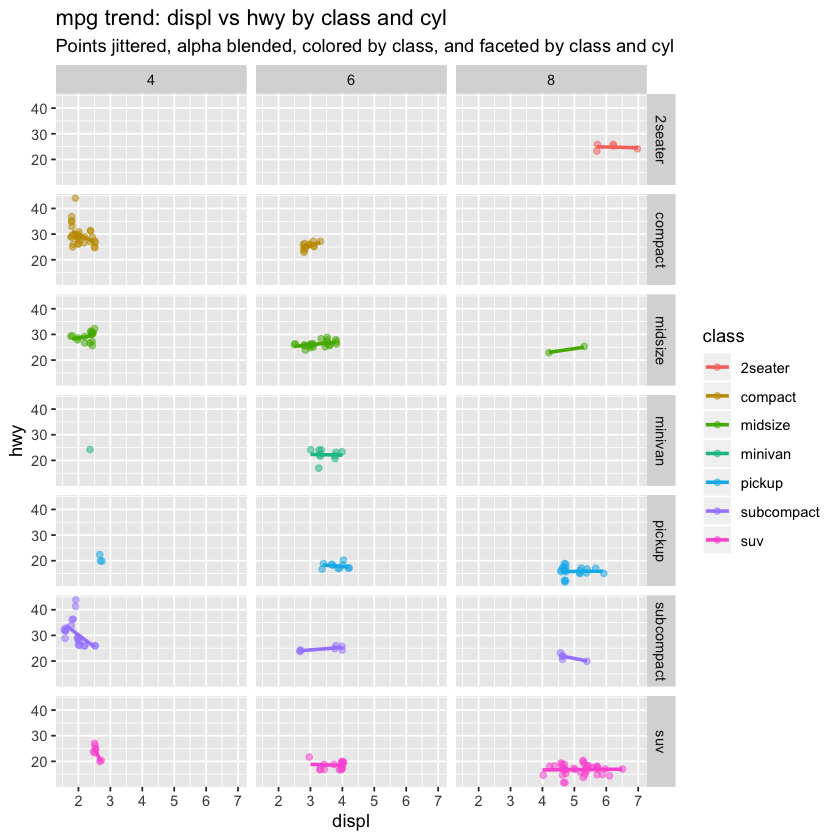

In [37]:
# Plot: scatterplot x = displ, y = hwy, color = class; 
# facet class (rows) by cyl (columns)
# Add jitter, alpha, and linear trend line and title
ggplot(df_filtered, mapping = aes(x = displ, y = hwy, color = class)) +
   geom_jitter(alpha = 0.5) +
   geom_smooth(method = "lm", se = FALSE) +
   facet_grid( class ~ cyl ) + 
   labs(title = "mpg trend: displ vs hwy by class and cyl",
       subtitle = "Points jittered, alpha blended, colored by class, and faceted by class and cyl")

# Using pipe
df_filtered %>% 
   ggplot(mapping = aes(x = displ, y = hwy, color = class)) +
   geom_jitter(alpha = 0.5) +
   geom_smooth(method = "lm", se = FALSE) +
   facet_grid( class ~ cyl ) + 
   labs(title = "mpg trend: displ vs hwy by class and cyl",
       subtitle = "Points jittered, alpha blended, colored by class, and faceted by class and cyl")

Notice that ggplot has its own 'pipe' like operator, the '+'. This is because ggplot was developed prior to the popularity of the pipe in R. Also, I would normally remove the 'mapping =' from ggplot and rely on its position instead.

# Plotting a subset of the data
What would happen if we only plotted the first 10 rows?

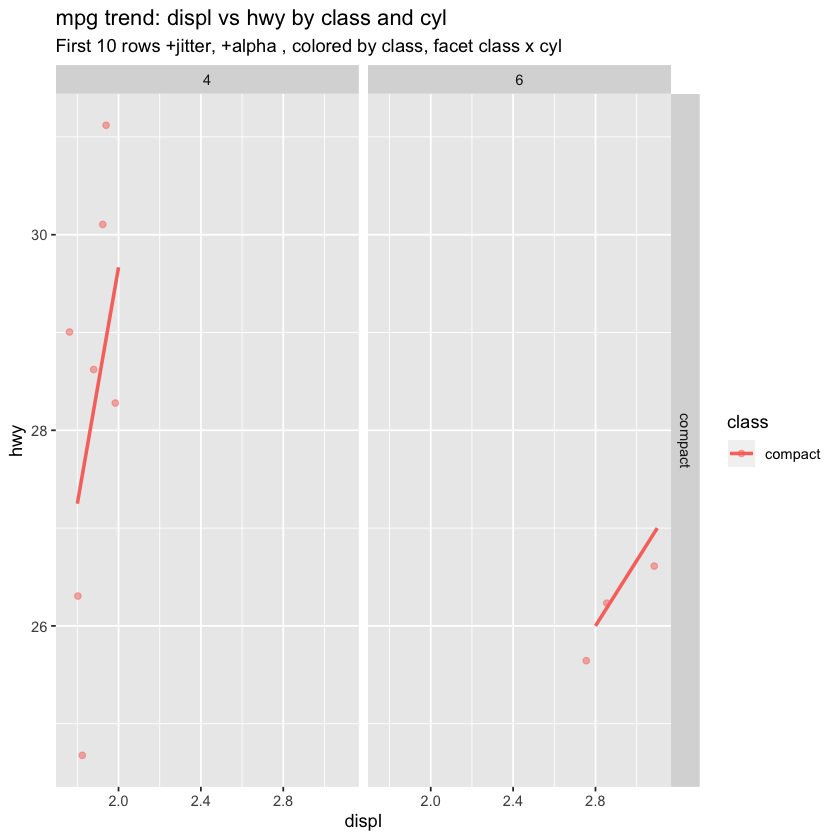

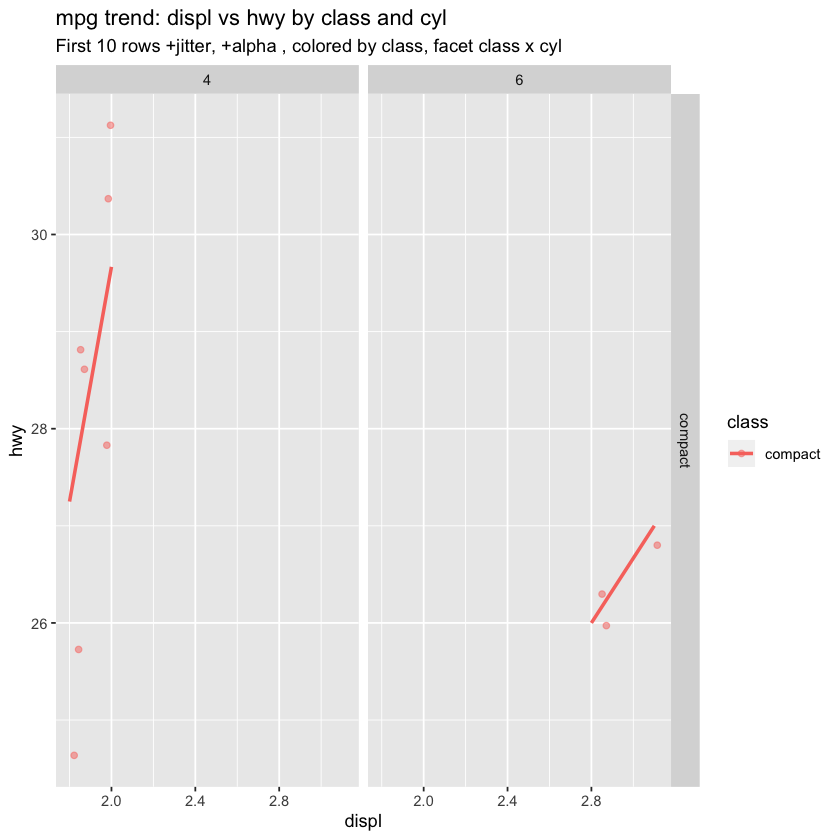

In [38]:
# Plot the first 10 rows of the prior plot
ggplot(head(df_filtered, n = 10), mapping = aes(x = displ, y = hwy, color = class)) +
   geom_jitter(alpha = 0.5) +
   geom_smooth(method = "lm", se = FALSE) +
   facet_grid( class ~ cyl ) + 
   labs(title = "mpg trend: displ vs hwy by class and cyl",
       subtitle = "First 10 rows +jitter, +alpha , colored by class, facet class x cyl")

# Using pipe
df_filtered %>% head(n = 10) %>% ggplot(mapping = aes(x = displ, y = hwy, color = class)) +
   geom_jitter(alpha = 0.5) +
   geom_smooth(method = "lm", se = FALSE) +
   facet_grid( class ~ cyl ) + 
   labs(title = "mpg trend: displ vs hwy by class and cyl",
       subtitle = "First 10 rows +jitter, +alpha , colored by class, facet class x cyl")

# Plot top 10 results
Let's plot the top 10 highest hwy of the previous plot.

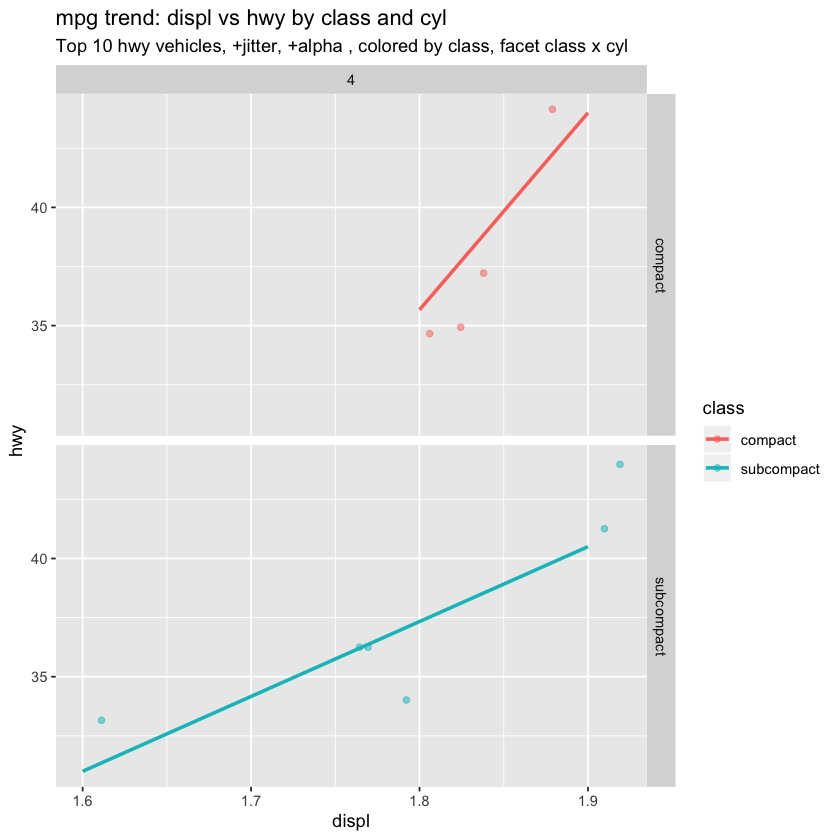

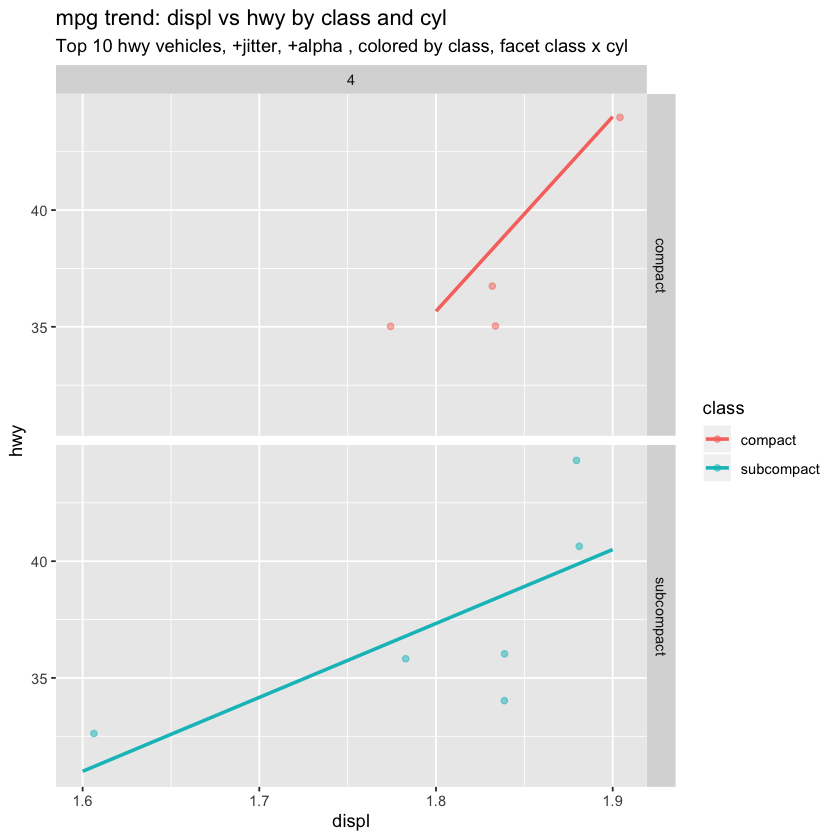

In [39]:
# Plot the top 10 highest hwy of the prior plot
ggplot(head(arrange(df_filtered, desc(hwy)), n = 10), mapping = aes(x = displ, y = hwy, color = class)) +
   geom_jitter(alpha = 0.5) +
   geom_smooth(method = "lm", se = FALSE) +
   facet_grid( class ~ cyl ) + 
   labs(title = "mpg trend: displ vs hwy by class and cyl",
       subtitle = "Top 10 hwy vehicles, +jitter, +alpha , colored by class, facet class x cyl")

# Using pipe
df_filtered %>% 
   arrange(desc(hwy)) %>% 
   head(n = 10) %>% 
   ggplot(mapping = aes(x = displ, y = hwy, color = class)) +
   geom_jitter(alpha = 0.5) +
   geom_smooth(method = "lm", se = FALSE) +
   facet_grid( class ~ cyl ) + 
   labs(title = "mpg trend: displ vs hwy by class and cyl",
       subtitle = "Top 10 hwy vehicles, +jitter, +alpha , colored by class, facet class x cyl")

# Code Summary
Let's summarize the piping code we just did. Let's also remove argument names such as 'n' and 'mapping' to make it more clear and add some new lines when it seems right to do that.

Observations: 234
Variables: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi", "audi", …
$ model        <chr> "a4", "a4", "a4", "a4", "a4", "a4", "a4", "a4 quattro", …
$ displ        <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2…
$ year         <int> 1999, 1999, 2008, 2008, 1999, 1999, 2008, 1999, 1999, 20…
$ cyl          <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8,…
$ trans        <chr> "auto(l5)", "manual(m5)", "manual(m6)", "auto(av)", "aut…
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "4", "4", "4", "4", "…
$ cty          <int> 18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, …
$ hwy          <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, …
$ fl           <chr> "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "…
$ class        <chr> "compact", "compact", "compact", "compact", "compact", "…


hwy,displ,cyl,class
<int>,<dbl>,<int>,<chr>
28,2.0,4,midsize
29,2.0,4,midsize
26,2.8,6,midsize
26,2.8,6,midsize
26,3.6,6,midsize


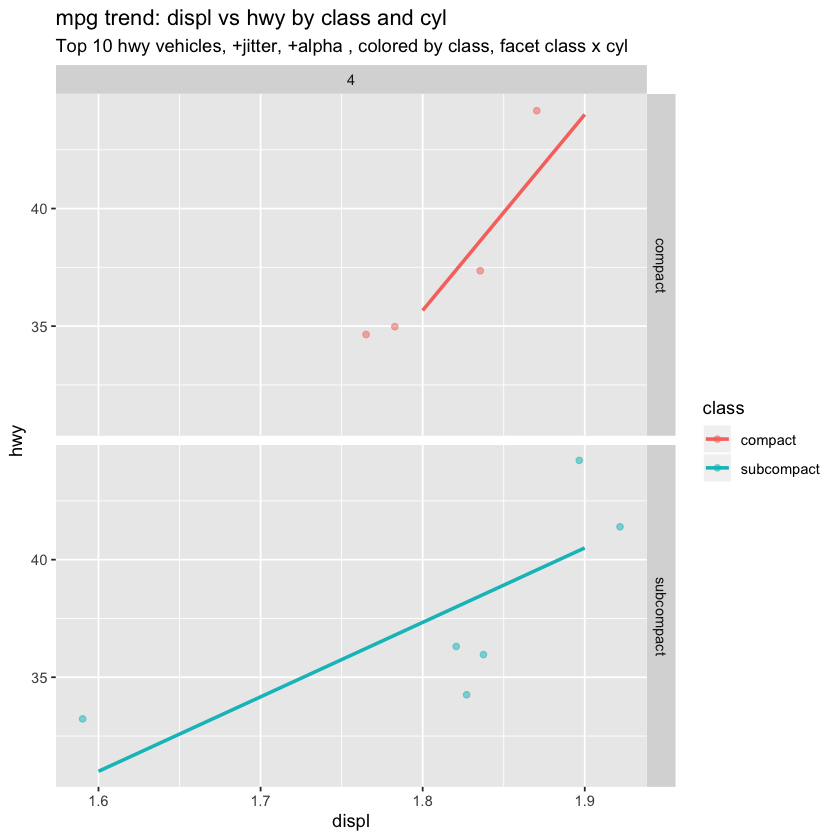

In [40]:
# Load libraries
library(tidyverse)

# Explore data structure
# Data: mpg
mpg %>% glimpse()

# Select hwy, displ, cyl, class
# Store in df
df <- mpg %>% 
   select( hwy, displ, cyl, class )

# Last 5 rows of df
df %>% tail( n = 5 )

# Name: df_filtered
# Filter: remove 5 cylinder rows
df_filtered <- df %>% 
   filter(cyl != 5)  # != or <> can be used for not equal

# Store top 10 hwy 
df_top_hwy <- df_filtered %>% 
   arrange(hwy %>% desc()) %>% 
   head(10)

# Plot using above variable
# x = displ, y = hwy, color = class; 
# facet class (rows) by cyl (columns)
# Add jitter, alpha, and linear trend line and title
df_top_hwy %>% 
   ggplot(aes(x = displ, y = hwy, color = class)) +
   geom_jitter(alpha = 0.5) +
   geom_smooth(method = "lm", se = FALSE) +
   facet_grid( class ~ cyl ) + 
   labs(title = "mpg trend: displ vs hwy by class and cyl",
       subtitle = "Top 10 hwy vehicles, +jitter, +alpha , colored by class, facet class x cyl")